# Exercises

## Fashion-MNIST 
The [Fashion-MNIST dataset](https://www.openml.org/d/40996) contains 70,000 images of Zalando fashion products, classified into 10 types of clothing, each represented by 28 by 28 pixel values. You can download it from OpenML and visualize some of the examples

In [1]:
# General imports
%matplotlib inline
from preamble import *
plt.rcParams['savefig.dpi'] = 100 # This controls the size of your figures

In [23]:
# Download FMINST data. Takes a while the first time.
fmnist = oml.tasks.get_task(146825, download_data=True)
fmnist_data = fmnist.get_dataset()
X, y, categorical_indicator, attribute_name = fmnist_data.get_data(
    dataset_format='array',
    target=fmnist_data.default_target_attribute
)
# FMINST data has a numeric target that can be mapped to the following names.
fmnist_classes = {0:"T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat", 5: "Sandal", 
                  6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle boot"}

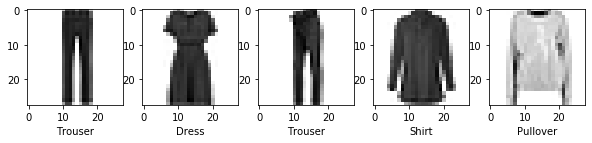

In [24]:
# Take some random examples, reshape to a 32x32 image and plot
from random import randint
fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
for i in range(5):
    n = randint(0,70000)
    axes[i].imshow(X[n].reshape(28, 28), cmap=plt.cm.gray_r)
    axes[i].set_xlabel((fmnist_classes[y[n]]))
plt.show();

#### 1. Evaluate different models
- Take a *stratified* 10% subsample of the data. Use it for everything below
- Start with k-Nearest Neighbors, Logistic Regression and Linear SVM
- Evaluate these 3 classifiers with their default settings. Use cross-validation with 3 folds, output the accuracy and standard deviation.
- Now compare other models as well (SVM, RandomForest, Boosting,...)

Note: you can use an even smaller sample while testing/bugfixing

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.01, stratify=y)
knn = KNeighborsClassifier(n_neighbors=1)
score = cross_val_score(knn,X_sample,y_sample)
np.mean(score)

0.6917270531400966

#### 2. Tune the parameters using GridSearchCV.
- Vary the main hyperparameter (C or k) for all 3 models. Do the results improve?  Which ranges have an effect on performance?
- (Optional) Visualize both the test score and training score as function of the parameters for all three models. Discuss when (for which values) the model is underfitting or overfitting.

Note: you can use a line plot or 1D heatmap for visualization. Use again 3-fold cross-validation and accuracy.

In [5]:
# You can use this generic plot for 1D grid search
# grid_search: the result of the GridSearchCV
# param_name: the name of the parameter that is being varied
def plot_tuning(grid_search, param_name):
    plt.figure()
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_test_score'], marker = '.', label = 'Test score')
    plt.plot(grid_search.param_grid[param_name], grid_search.cv_results_['mean_train_score'], marker = '.', label = 'Train score')
    ax = plt.gca()
    ax.set_ylabel('score (ACC)')
    ax.set_xlabel(param_name)
    ax.legend()
    plt.title(grid_search.best_estimator_.__class__.__name__)
    print('Best configuration:' + str(grid_search.best_params_))
    print('Best score (ACC):' + str(grid_search.best_score_))

#### 3. Upload your best models to OpenML
* You can use the code below. Enter your OpenML Key.
* Replace the classifier with your best classifier and its hyperparameters
* Run and upload the model
    - Note: since this uses the full MNIST dataset, it will take longer than in exercise 1
* Compare with the other models on https://www.openml.org/t/146825

In [28]:
from sklearn import tree
oml.config.apikey = 'YOUR_KEY'

# Get the Fashion MNIST classification task
task = oml.tasks.get_task(146825)

# Build any classifier or pipeline -> replace with your best model
clf = tree.ExtraTreeClassifier()

# Run the model on the task
run = oml.runs.run_model_on_task(clf, task)
myrun = run.publish()
print("Uploaded to http://www.openml.org/r/" + str(myrun.run_id))

Uploaded to http://www.openml.org/r/10398391


#### 4 Analyze which types of misclassifications are made (advanced)
- Create a standard train_test split
- Train Logistic Regression on the training data and generate predictions on the test set
- Visualize (like above) a few examples that are misclassified by Logistic Regression. Discuss: are these indeed difficult cases?
- Build the 'confusion_matrix' of all predictions. Discuss which classes are often confused.

#### 5 Visualize the model parameters (advanced)
- Retrieve the model parameters (coefficients) for LogisticRegression and Linear Support Vector Machines
- Plot the coefficients as a 28*28 image as above. 
- Interpret the results. Which pixels does the models pay most attention to? Why? Is there a difference between both models?

## Regression: Online news popularity
* Data collected from a news site (Mashable)
* Predict the number of `shares` based on article statistics
* See https://www.openml.org/d/4545
* Real-world data:
    - Different numeric scales
    - Likely irrelevant features
    - Numeric or binary features
    - No missing values
    
```
news_data = fetch_openml("OnlineNewsPopularity")
```

#### Exercise
* Build a pipeline that allows you to predict the number of shares using a simple linear regression algorithm
* Try multiple other regression models to see which work best
* Upload your best models to OpenML

## Try some other datasets
* Browse OpenML for datasets that you find interesting, and try to build models on those.
* Or, find datasets that you find interesting and [upload them](https://openml.github.io/openml-python/master/examples/create_upload_tutorial.html#sphx-glr-examples-create-upload-tutorial-py)
* Upload your best results to OpenML
* Examples:
    * EEG eye state: data_id:[1471](http://www.openml.org/d/1471), task_id:[14951](http://www.openml.org/t/14951)
    * Volcanoes on Venus: data_id:[1527](http://www.openml.org/d/1527), task_id:[10103](http://www.openml.org/t/10103)
    * Walking activity: data_id:[1509](http://www.openml.org/d/1509), task_id: [9945](http://www.openml.org/t/9945), 150k instances
    * Covertype (Satellite): data_id:[150](http://www.openml.org/d/150), task_id: [218](http://www.openml.org/t/218). 500k instances
    * Higgs (Physics): data_id:[23512](http://www.openml.org/d/23512), task_id:[52950](http://www.openml.org/t/52950). 100k instances, missing values